# import yang dibutuhkan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

# Membaca dataset

In [48]:
df = pd.read_csv('Mall_Customers.csv')

In [49]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# persiapan dataset (data preparation)

In [1]:
df.rename(index=str, columns={
    'Annual Income (k$)' : 'Income',
    'Spending Score (1-100)' : 'Score'
}, inplace=True)

NameError: name 'df' is not defined

# menghapus kolom CustomerID dan Gender

In [52]:
X = df.drop(['CustomerID', 'Gender'], axis=1)

In [53]:
print(X)

     Age  Income  Score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


# Menentukan jumlah cluster dengan elbow

c:\Users\parha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\parha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\parha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\parha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'inertia')

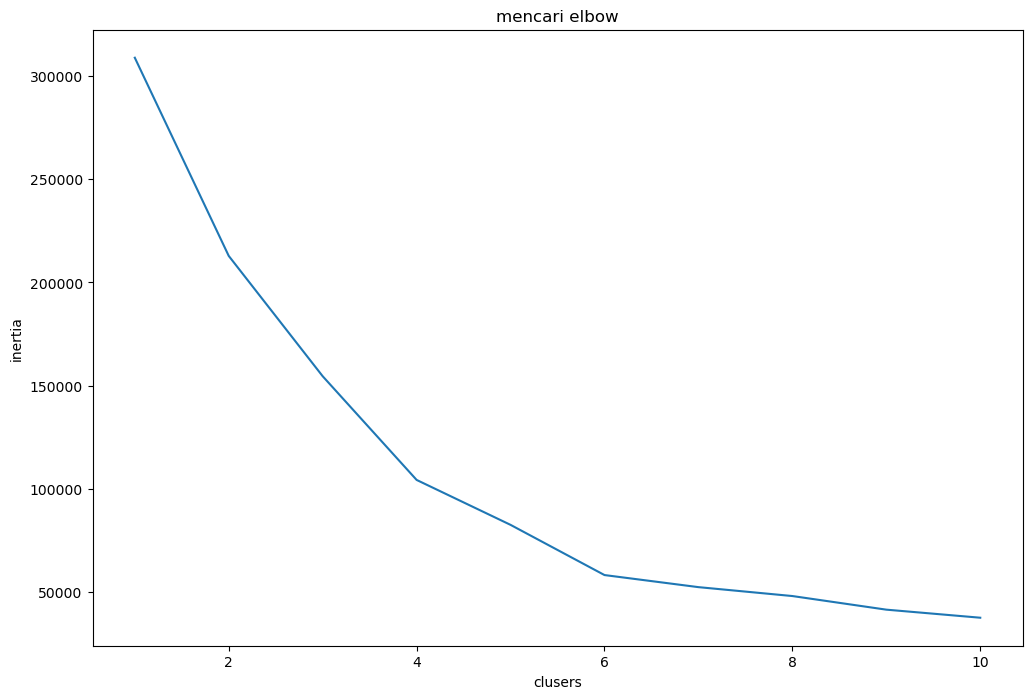

In [55]:
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusers')
ax.set_ylabel('inertia')

#panah elbow
# ax.annotate('Possible elbow point', xy=(3,140000), xytext=(3,50000), xycoords='data', 
#             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

# ax.annotate('Possible elbow point', xy=(5,80000), xytext=(5,120000), xycoords='data', 
#             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

# Proses clustering

In [ ]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

c:\Users\parha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


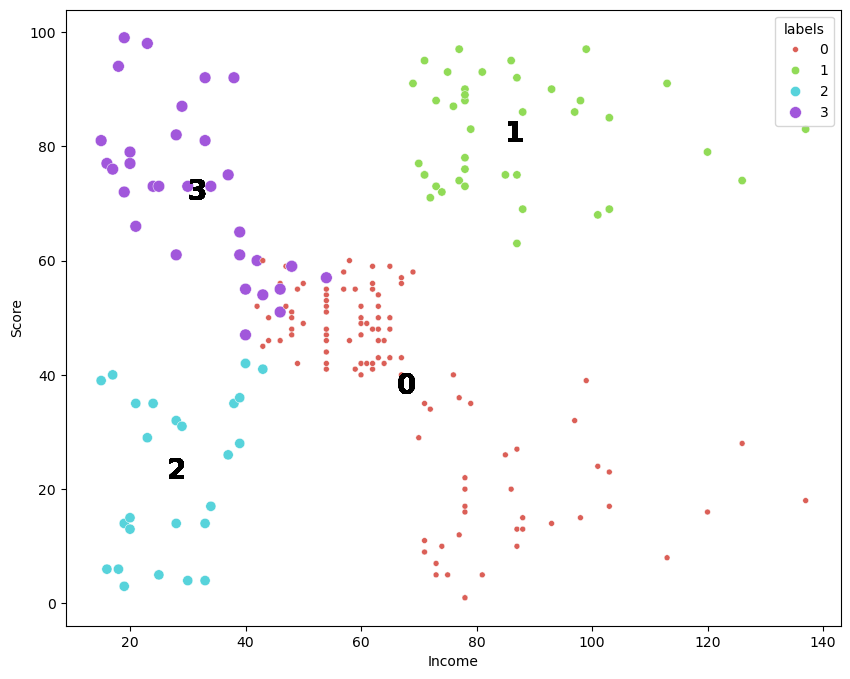

In [72]:
plt.figure(figsize=(10,8))
sns.scatterplot(x= X['Income'], y=X['Score'], hue=X['labels'], markers=True, size=X['labels'], 
                palette=sns.color_palette('hls', n_clust))

for label in X['labels'] :
    plt.annotate(label,
                 (X[X['labels']==label]['Income'].mean(),
                  X[X['labels']==label]['Score'].mean()), 
                  horizontalalignment = 'center',
                  verticalalignment='center',
                  size = 20, weight = 'bold',
                  color = 'black')

     

In [73]:
print(X)

     Age  Income  Score  labels
0     19      15     39       2
1     21      15     81       3
2     20      16      6       2
3     23      16     77       3
4     31      17     40       2
..   ...     ...    ...     ...
195   35     120     79       1
196   45     126     28       0
197   32     126     74       1
198   32     137     18       0
199   30     137     83       1

[200 rows x 4 columns]


In [74]:
X.to_excel('output_cluster.xlsx')